ANÁLISIS DE REDES COMPLEJAS: SERVICIO-TAREA
============================================
Análisis de red bipartita y proyecciones para servicios y tareas

Autores:
- Garcia Nikole
- Garcia Andrea
- Lazaro Luis

Fecha: Noviembre 2025

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pickle
import os
from pathlib import Path

# 1. Carga y Exploracion de Datos

In [ ]:
# Configuración de rutas
RUTA_DATOS = 'datosRed.xlsx'
CARPETA_FIGURAS = Path("figuras")
CARPETA_REDES = Path("redes_guardadas")
CARPETA_RESULTADOS = Path("resultados")

# Crear directorios
for carpeta in [CARPETA_FIGURAS, CARPETA_REDES, CARPETA_RESULTADOS]:
    carpeta.mkdir(parents=True, exist_ok=True)

In [ ]:
# Cargamos la data limpia
df = pd.read_excel('datosRed.xlsx')
print(f"✓ Datos cargados: {len(df)} registros")

# Preparar tabla servicio-tarea : Nos quedamos solo con las columnas relevantes
df_servicio_tarea = df[['TIPO DE SERVICIO', 'NOMBRE DE LA TAREA']].drop_duplicates()

print(f"✓ Relaciones servicio-tarea únicas: {len(df_servicio_tarea)} \n")
print(df_servicio_tarea.head(20))

✓ Datos cargados: 10384 registros
✓ Relaciones servicio-tarea únicas: 18 

     TIPO DE SERVICIO NOMBRE DE LA TAREA
0              SERV_1          TAREA_1.1
450            SERV_2          TAREA_2.1
475            SERV_3          TAREA_3.1
676            SERV_4          TAREA_4.1
699            SERV_5          TAREA_5.1
701            SERV_2          TAREA_2.2
758            SERV_4          TAREA_4.2
851            SERV_1          TAREA_1.2
892            SERV_6          TAREA_6.1
1266           SERV_7          TAREA_7.1
2230           SERV_4          TAREA_4.3
5020           SERV_3          TAREA_3.2
7218           SERV_3          TAREA_3.3
7568           SERV_5          TAREA_5.2
7639           SERV_4          TAREA_4.4
8015           SERV_3          TAREA_3.4
8078           SERV_5          TAREA_5.3
8522           SERV_1          TAREA_1.3


In [ ]:
# Estadísticas descriptivas
servicios_top = df_servicio_tarea['TIPO DE SERVICIO'].value_counts().head(10)
print("• Top 10 servicios con más tareas:")
print(servicios_top)

tareas_top = df_servicio_tarea['NOMBRE DE LA TAREA'].value_counts().head(10)
print("\n• Top 10 tareas más frecuentes:")
print(tareas_top)


• Top 10 servicios con más tareas:
TIPO DE SERVICIO
SERV_3    4
SERV_4    4
SERV_1    3
SERV_5    3
SERV_2    2
SERV_6    1
SERV_7    1
Name: count, dtype: int64

• Top 10 tareas más frecuentes:
NOMBRE DE LA TAREA
TAREA_1.1    1
TAREA_2.1    1
TAREA_3.1    1
TAREA_4.1    1
TAREA_5.1    1
TAREA_2.2    1
TAREA_4.2    1
TAREA_1.2    1
TAREA_6.1    1
TAREA_7.1    1
Name: count, dtype: int64


# 2. Construcción de la Red Bipartita
Objetivo: Construir y analizar una red bipartita servicio–tarea y su proyección a tarea-tarea, considerando:

- Tipo de red
- Criterios de enlace
- Ventanas temporales (por año)

## 2.1. Tipo de red: Bipartita servicio–tarea

- Nodos tipo 1: servicio (servicios)
- Nodos tipo 2: TAREA (tareas)
- Enlace: un servicio tiene una tarea

In [ ]:
print("CONSTRUCCIÓN DE RED BIPARTITA")
print("-" * 60)

B = nx.Graph()
servicios = df["TIPO DE SERVICIO"].unique()
tareas = df["NOMBRE DE LA TAREA"].unique()

B.add_nodes_from(servicios, bipartite=0)
B.add_nodes_from(tareas, bipartite=1)
B.add_edges_from(zip(df["TIPO DE SERVICIO"], df["NOMBRE DE LA TAREA"]))


print(f"✓ Red bipartita creada:")
print(f"  - Nodos totales: {B.number_of_nodes()}")
print(f"  - Servicios: {len(servicios)}")
print(f"  - Tareas: {len(tareas)}")
print(f"  - Enlaces: {B.number_of_edges()}")

CONSTRUCCIÓN DE RED BIPARTITA
------------------------------------------------------------
✓ Red bipartita creada:
  - Nodos totales: 25
  - Servicios: 7
  - Tareas: 18
  - Enlaces: 18


In [ ]:
densidad_bipartita = nx.density(B)
componentes_bipartita = nx.number_connected_components(B)
print("Métricas básicas:")
print(f" - Densidad: {densidad_bipartita:.4f}")
print(f" - Componentes conexas: {componentes_bipartita}")

Métricas básicas:
 - Densidad: 0.0600
 - Componentes conexas: 7


In [ ]:
# Guardar red bipartita
ruta_bipartita = CARPETA_REDES / "principales" / "red_bipartita_servicio_tarea.pkl"
ruta_bipartita.parent.mkdir(parents=True, exist_ok=True)
with open(ruta_bipartita, "wb") as f:
    pickle.dump(B, f)
print(f"✓ Red bipartita guardada en: {ruta_bipartita}")

✓ Red bipartita guardada en: redes_guardadas/principales/red_bipartita_servicio_tarea.pkl


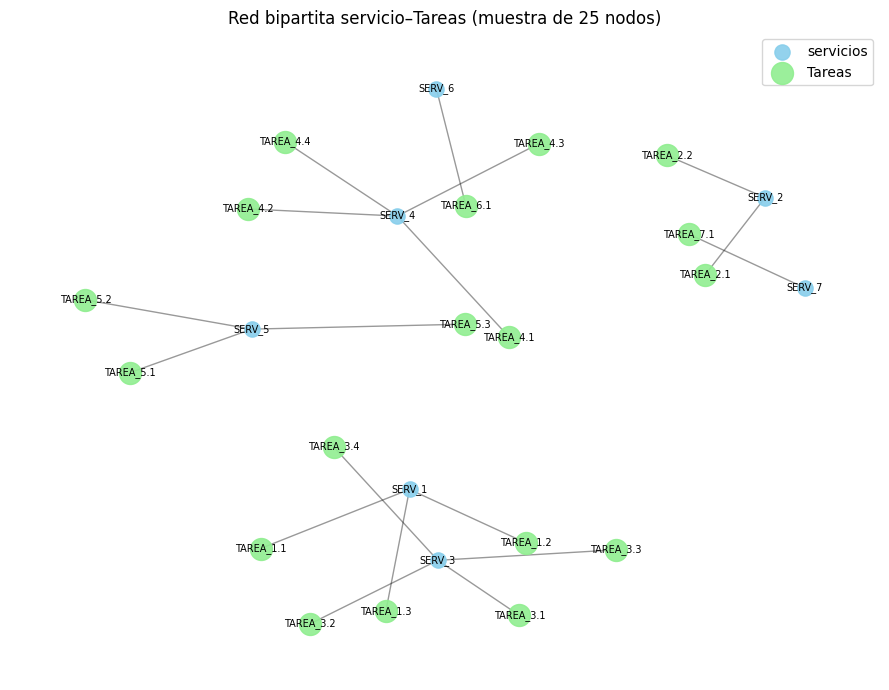

Figura guardada en: figuras/bipartita/red_bipartita_servicio_tareas_muestra.png


In [ ]:
# Visualización de una submuestra de la red bipartita

# Número de servicios y tareas a mostrar (ajusta según tamaño)
num_servicios_muestra = 150
num_tareas_muestra = 150

# Selecciona una muestra de ambos tipos
servicios_muestra = list(servicios)[:num_servicios_muestra]
tareas_muestra = list(tareas)[:num_tareas_muestra]

# Incluye solo las conexiones entre ellos
nodos_muestra = servicios_muestra + tareas_muestra
B_sub = B.subgraph(nodos_muestra).copy()

# Layout bipartito para mayor claridad
pos_sub = nx.spring_layout(B_sub, seed=42, k=0.6)

# Crear carpeta si no existe
carpeta_fig_bipartita = os.path.join("figuras", "bipartita")
os.makedirs(carpeta_fig_bipartita, exist_ok=True)

# Dibujo
plt.figure(figsize=(9, 7))
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=servicios_muestra,
                       node_color='skyblue', node_size=120, label='servicios', alpha=0.9)
nx.draw_networkx_nodes(B_sub, pos_sub, nodelist=tareas_muestra,
                       node_color='lightgreen', node_size=250, label='Tareas', alpha=0.9)
nx.draw_networkx_edges(B_sub, pos_sub, alpha=0.4)
nx.draw_networkx_labels(B_sub, pos_sub, font_size=7)

plt.title(f"Red bipartita servicio–Tareas (muestra de {len(B_sub.nodes())} nodos)")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.tight_layout()

# Guardar figura
ruta_figura = os.path.join(carpeta_fig_bipartita, "red_bipartita_servicio_tareas_muestra.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches="tight")
plt.show()

print(f"Figura guardada en: {ruta_figura}")

# 3. PROYECCIÓN TAREA-TAREA
- Criterio: Dos tareas estarán conectadas si al menos un servicio ha utilizado ambos tareas.
- Tipo de red resultante: ponderada (por número de servicios en común).

## Proyección ponderada completa

In [ ]:
print(" PROYECCIÓN TAREA-TAREA")
print("-" * 60)

tareas_set = {n for n, d in B.nodes(data=True) if d["bipartite"] == 1}
G_tareas = bipartite.weighted_projected_graph(B, tareas_set)

print("Red tarea-tarea (completa):")
print(f" - Nodos: {G_tareas.number_of_nodes()}")
print(f" - Enlaces: {G_tareas.number_of_edges()}")

 PROYECCIÓN TAREA-TAREA
------------------------------------------------------------
Red tarea-tarea (completa):
 - Nodos: 18
 - Enlaces: 19


## Red filtrada por peso
Filtrado por peso para eliminar enlaces débiles

In [ ]:
umbral = 1  # se puede ajustar este valor según densidad
G_tareas_filtrada = nx.Graph(
    ((u, v, d) for u, v, d in G_tareas.edges(data=True) if d.get("weight", 0) >= umbral)
)

print(f"✓ Red tarea-tarea (filtrada, peso ≥ {umbral}):")
print(f"  - Nodos: {G_tareas_filtrada.number_of_nodes()}")
print(f"  - Enlaces: {G_tareas_filtrada.number_of_edges()}")
print(f"  - Densidad: {nx.density(G_tareas_filtrada):.4f}")

✓ Red tarea-tarea (filtrada, peso ≥ 1):
  - Nodos: 16
  - Enlaces: 19
  - Densidad: 0.1583


In [ ]:
# Guardar proyecciones
ruta_completa = CARPETA_REDES / "principales" / "red_tarea_tarea_completa.pkl"
ruta_filtrada = CARPETA_REDES / "principales" / "red_tarea_tarea_filtrada.pkl"

with open(ruta_completa, "wb") as f:
    pickle.dump(G_tareas, f)
with open(ruta_filtrada, "wb") as f:
    pickle.dump(G_tareas_filtrada, f)

print(f"✓ Redes guardadas en: {CARPETA_REDES / 'principales'}")

✓ Redes guardadas en: redes_guardadas/principales


## Visualización comparativa

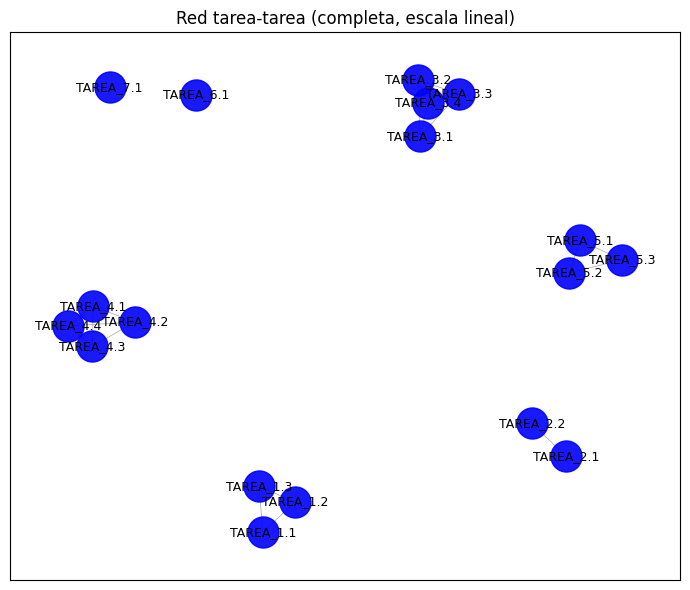

Figura guardada en: figuras/tareas/completa/red_tarea_tarea_completa_lineal.png


In [ ]:
# Crear carpeta si no existe
carpeta_fig_tareas = os.path.join("figuras", "tareas", "completa")
os.makedirs(carpeta_fig_tareas, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_full = nx.spring_layout(G_tareas, seed=42, k=0.4)
edge_weights_full = [d.get("weight", 1) for _, _, d in G_tareas.edges(data=True)]
edge_widths_full = [max(0.5, w * 0.1) for w in edge_weights_full]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_tareas, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_tareas, pos_full, width=edge_widths_full, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_tareas, pos_full, font_size=9)

plt.title("Red tarea-tarea (completa, escala lineal)")
plt.tight_layout()

# Guardar figura antes de mostrar
ruta_figura_tareas = os.path.join(carpeta_fig_tareas, "red_tarea_tarea_completa_lineal.png")
plt.savefig(ruta_figura_tareas, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_tareas}")

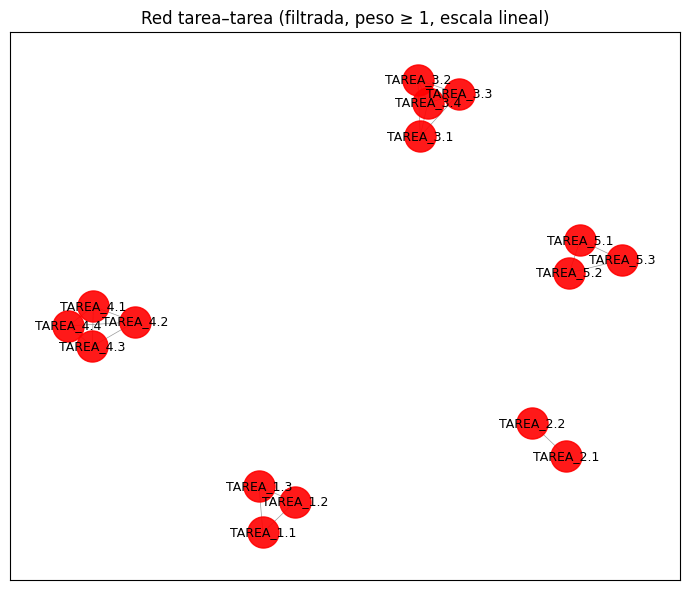

Figura guardada en: figuras/tareas/filtrada/red_tarea_tarea_filtrada_lineal.png


In [ ]:
# Red tarea-tarea (filtrada, escala lineal)
# Crear carpetas si no existen
carpeta_base = os.path.join("figuras", "tareas", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

# Layout y pesos
plt.figure(figsize=(7, 6))
pos_filt = {n: pos_full[n] for n in G_tareas_filtrada.nodes() if n in pos_full}

edge_weights_filt = [d.get("weight", 1) for _, _, d in G_tareas_filtrada.edges(data=True)]
edge_widths_filt = [max(0.5, w * 0.1) for w in edge_weights_filt]  # Escala lineal

# Dibujo
nx.draw_networkx_nodes(G_tareas_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_tareas_filtrada, pos_filt, width=edge_widths_filt, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_tareas_filtrada, pos_filt, font_size=9)

plt.title(f"Red tarea–tarea (filtrada, peso ≥ {umbral}, escala lineal)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_tarea_tarea_filtrada_lineal.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

print(f"Figura guardada en: {ruta_figura_filt_lineal}")

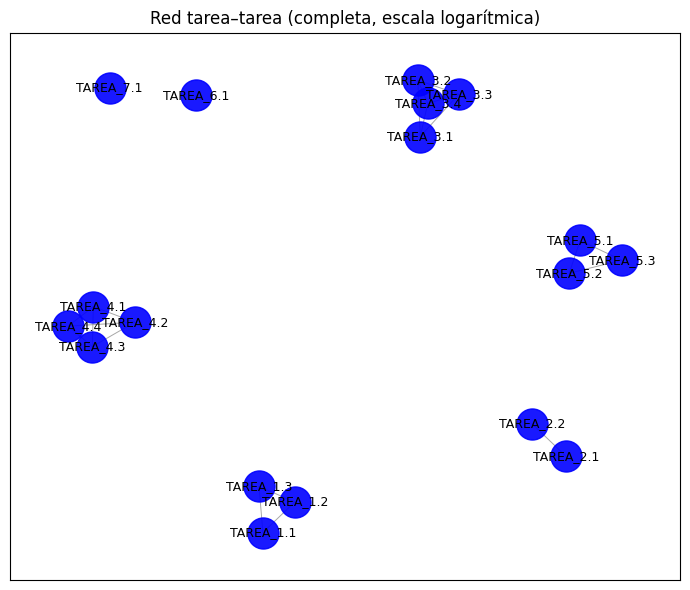

Figura guardada en: figuras/tareas/completa/red_tarea_tarea_completa_log.png


In [ ]:
# Red tarea–tarea (completa, escala logarítmica)

carpeta_fig_tareas = os.path.join("figuras", "tareas", "completa")
os.makedirs(carpeta_fig_tareas, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_full_log = [np.log1p(w) for w in edge_weights_full]  # Escala log(1+w)
nx.draw_networkx_nodes(G_tareas, pos_full, node_size=500, node_color="blue", alpha=0.9)
nx.draw_networkx_edges(G_tareas, pos_full, width=edge_widths_full_log, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G_tareas, pos_full, font_size=9)

plt.title("Red tarea–tarea (completa, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_tareas = os.path.join(carpeta_fig_tareas, "red_tarea_tarea_completa_log.png")
plt.savefig(ruta_figura_tareas, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_tareas}")

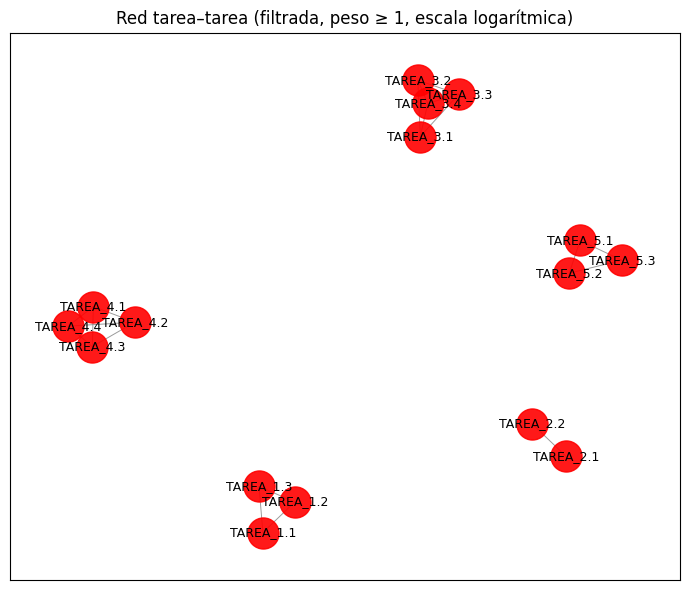

Figura guardada en: figuras/tareas/completa/red_tarea_tarea_completa_log.png


In [ ]:
# Red tarea–tarea (filtrada, escala logarítmica)
carpeta_base = os.path.join("figuras", "tareas", "filtrada")
os.makedirs(carpeta_base, exist_ok=True)

plt.figure(figsize=(7, 6))
edge_widths_filt_log = [np.log1p(w) for w in edge_weights_filt]

nx.draw_networkx_nodes(G_tareas_filtrada, pos_filt, node_size=500, node_color="red", alpha=0.9)
nx.draw_networkx_edges(G_tareas_filtrada, pos_filt, width=edge_widths_filt_log, edge_color="gray", alpha=0.8)
nx.draw_networkx_labels(G_tareas_filtrada, pos_filt, font_size=9)

plt.title(f"Red tarea–tarea (filtrada, peso ≥ {umbral}, escala logarítmica)")
plt.tight_layout()

# Guardar figura
ruta_figura_filt_lineal = os.path.join(carpeta_base, "red_tarea_tarea_filtrada_log.png")
plt.savefig(ruta_figura_filt_lineal, dpi=300, bbox_inches='tight')

plt.show()
plt.close()
print(f"Figura guardada en: {ruta_figura_tareas}")

Vemos que la fuerza entre las conexiones es la misma, no hay algun qe predomin y eso es que porque cada una de esas tareas pertenece a un servicio.

# 4. ANÁLISIS TEMPORAL (POR AÑO)

## 4.1 Ventanas temporales (por año)

- Se construyen redes bipartitas y proyecciones por año para estudiar cambios en el tiempo.

In [ ]:
print(" ANÁLISIS TEMPORAL (POR AÑO)")
print("-" * 60)

redes_por_año = {}
metricas_temporales = []

for año, grupo in df.groupby("AÑO"):
    B_año = nx.Graph()
    servicios_año = grupo["TIPO DE SERVICIO"].unique()
    tareas_año = grupo["NOMBRE DE LA TAREA"].unique()

    B_año.add_nodes_from(servicios_año, bipartite=0)
    B_año.add_nodes_from(tareas_año, bipartite=1)
    B_año.add_edges_from(zip(grupo["TIPO DE SERVICIO"], grupo["NOMBRE DE LA TAREA"]))

    # Proyección tarea–tarea ponderada
    G_tareas_año = bipartite.weighted_projected_graph(B_año, tareas_año)
    redes_por_año[año] = G_tareas_año

    # Calcular métricas
    num_nodos = G_tareas_año.number_of_nodes()
    num_enlaces = G_tareas_año.number_of_edges()
    densidad = nx.density(G_tareas_año) if num_nodos > 0 else 0

    metricas_temporales.append({
        'año': año,
        'nodos': num_nodos,
        'enlaces': num_enlaces,
        'densidad': densidad
    })

    print(f"✓ Año {año}: {num_nodos} nodos, {num_enlaces} enlaces, densidad = {densidad:.4f}")

 ANÁLISIS TEMPORAL (POR AÑO)
------------------------------------------------------------
✓ Año 2019: 1 nodos, 0 enlaces, densidad = 0.0000
✓ Año 2020: 10 nodos, 3 enlaces, densidad = 0.0667
✓ Año 2021: 11 nodos, 4 enlaces, densidad = 0.0727
✓ Año 2022: 11 nodos, 4 enlaces, densidad = 0.0727
✓ Año 2023: 16 nodos, 13 enlaces, densidad = 0.1083
✓ Año 2024: 13 nodos, 7 enlaces, densidad = 0.0897


In [ ]:
# Guardar redes por año
carpeta_temporal = CARPETA_REDES / "por_año"
carpeta_temporal.mkdir(parents=True, exist_ok=True)

for año, red in redes_por_año.items():
    ruta_año = carpeta_temporal / f"red_tarea_tarea_{año}.pkl"
    with open(ruta_año, "wb") as f:
        pickle.dump(red, f)

In [ ]:
# Guardar tabla de métricas temporales
df_temporal = pd.DataFrame(metricas_temporales)
ruta_metricas_temp = CARPETA_RESULTADOS / "metricas_temporales.csv"
df_temporal.to_csv(ruta_metricas_temp, index=False)
print(f"✓ Métricas temporales guardadas en: {ruta_metricas_temp}")

✓ Métricas temporales guardadas en: resultados/metricas_temporales.csv


In [ ]:
# Ejemplo: inspeccionamos la red del 2024
G_2024 = redes_por_año.get(2024)
if G_2024:
    print("Ejemplo (2024): algunos enlaces con peso")
    for u, v, data in list(G_2024.edges(data=True))[:30]:
        print(f"{u} -- {v} (peso={data['weight']})")

Ejemplo (2024): algunos enlaces con peso
TAREA_3.1 -- TAREA_3.2 (peso=1)
TAREA_4.1 -- TAREA_4.3 (peso=1)
TAREA_1.1 -- TAREA_1.2 (peso=1)
TAREA_2.1 -- TAREA_2.2 (peso=1)
TAREA_5.3 -- TAREA_5.1 (peso=1)
TAREA_5.3 -- TAREA_5.2 (peso=1)
TAREA_5.2 -- TAREA_5.1 (peso=1)


Se guardan las redes (completas, filtradas y temporales)

In [ ]:
# Definir carpetas de salida
carpeta_general = "redes_guardadas"
carpeta_principal = os.path.join(carpeta_general, "principales")
carpeta_por_año = os.path.join(carpeta_general, "por_año")

# Crear carpetas si no existen
os.makedirs(carpeta_principal, exist_ok=True)
os.makedirs(carpeta_por_año, exist_ok=True)

# Archivos principales
out_files = {
    "bipartita": os.path.join(carpeta_principal, "red_bipartita_servicio_tarea.pkl"),
    "tareas_completa": os.path.join(carpeta_principal, "red_tarea_tarea_completa.pkl"),
    "tareas_filtrada": os.path.join(carpeta_principal, "red_tarea_tarea_filtrada.pkl")
}

# Guardar las redes principales
with open(out_files["bipartita"], "wb") as f:
    pickle.dump(B, f)
with open(out_files["tareas_completa"], "wb") as f:
    pickle.dump(G_tareas, f)
with open(out_files["tareas_filtrada"], "wb") as f:
    pickle.dump(G_tareas_filtrada, f)

# Guardar las redes por año
for año, red in redes_por_año.items():
    ruta_año = os.path.join(carpeta_por_año, f"red_tarea_tarea_{año}.pkl")
    with open(ruta_año, "wb") as f:
        pickle.dump(red, f)

# Mostrar resumen
print("Redes guardadas con éxito.")
print(f"Carpeta principal: {carpeta_general}\n")

for carpeta in [carpeta_principal, carpeta_por_año]:
    print(f"Contenido de '{carpeta}':")
    for file in os.listdir(carpeta):
        print("   -", file)


Redes guardadas con éxito.
Carpeta principal: redes_guardadas

Contenido de 'redes_guardadas/principales':
   - red_bipartita_servicio_tarea.pkl
   - red_tarea_tarea_filtrada.pkl
   - red_tarea_tarea_completa.pkl
Contenido de 'redes_guardadas/por_año':
   - red_tarea_tarea_2021.pkl
   - red_tarea_tarea_2023.pkl
   - red_tarea_tarea_2019.pkl
   - red_tarea_tarea_2024.pkl
   - red_tarea_tarea_2022.pkl
   - red_tarea_tarea_2020.pkl


# 5. Métricas globales



In [ ]:
print(" MÉTRICAS GLOBALES")
print("-" * 60)

G = G_tareas_filtrada
is_weighted = nx.is_weighted(G)

# Componentes conexas
ccs = list(nx.connected_components(G))
ccs_sizes = [len(c) for c in ccs]
G_gc_nodes = max(ccs, key=len) if ccs else set()
G_gc = G.subgraph(G_gc_nodes).copy() if len(G_gc_nodes) > 0 else G.copy()

# Calcular métricas
metrics_global = {
    "nodos": G.number_of_nodes(),
    "enlaces": G.number_of_edges(),
    "densidad": nx.density(G),
    "num_componentes": nx.number_connected_components(G),
    "tamaño_componente_gigante": len(G_gc),
    "transitividad_global": nx.transitivity(G),
    "clustering_promedio": np.mean(list(nx.clustering(G).values())) if G.number_of_nodes() else 0.0
}

# Distancias (solo en componente gigante)
try:
    if G_gc.number_of_nodes() > 1:
        metrics_global["longitud_media_caminos_GC"] = nx.average_shortest_path_length(G_gc)
        metrics_global["diametro_GC"] = nx.diameter(G_gc)
    else:
        metrics_global["longitud_media_caminos_GC"] = np.nan
        metrics_global["diametro_GC"] = np.nan
except nx.NetworkXError:
    metrics_global["longitud_media_caminos_GC"] = np.nan
    metrics_global["diametro_GC"] = np.nan

df_global = pd.DataFrame([metrics_global]).T.rename(columns={0: "valor"})
print(df_global)

 MÉTRICAS GLOBALES
------------------------------------------------------------
                               valor
nodos                      16.000000
enlaces                    19.000000
densidad                    0.158333
num_componentes             5.000000
tamaño_componente_gigante   4.000000
transitividad_global        1.000000
clustering_promedio         0.875000
longitud_media_caminos_GC   1.000000
diametro_GC                 1.000000


In [ ]:
ruta_metricas_global = CARPETA_RESULTADOS / "metricas_globales.csv"
df_global.to_csv(ruta_metricas_global)
print(f"✓ Métricas globales guardadas en: {ruta_metricas_global}")

✓ Métricas globales guardadas en: resultados/metricas_globales.csv


# 6. Centralidades

In [ ]:
print(" ANÁLISIS DE CENTRALIDADES")
print("-" * 60)

# Calcular centralidades
deg_cent = nx.degree_centrality(G)
close_cent = nx.closeness_centrality(G)
betw_cent = nx.betweenness_centrality(G, normalized=True)

try:
    eig_cent = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    eig_cent = nx.eigenvector_centrality(G_gc, max_iter=1000)
    eig_cent = {**{n:0.0 for n in G.nodes()}, **eig_cent}

pr_cent = nx.pagerank(G, alpha=0.85)

# Crear tabla de centralidades
df_cent = pd.DataFrame({
    "degree": pd.Series(deg_cent),
    "closeness": pd.Series(close_cent),
    "betweenness": pd.Series(betw_cent),
    "eigenvector": pd.Series(eig_cent),
    "pagerank": pd.Series(pr_cent),
}).fillna(0.0).sort_values("eigenvector", ascending=False)

print("\n Top 15 nodos por centralidad de autovector:\n")
print(df_cent.round(4).head(15))


 ANÁLISIS DE CENTRALIDADES
------------------------------------------------------------

 Top 15 nodos por centralidad de autovector:

           degree  closeness  betweenness  eigenvector  pagerank
TAREA_4.1  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_4.4  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_4.2  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_4.3  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_3.4  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_3.1  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_3.2  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_3.3  0.2000     0.2000          0.0       0.3536    0.0625
TAREA_5.1  0.1333     0.1333          0.0       0.0000    0.0625
TAREA_1.3  0.1333     0.1333          0.0       0.0000    0.0625
TAREA_5.2  0.1333     0.1333          0.0       0.0000    0.0625
TAREA_5.3  0.1333     0.1333          0.0       0.0000    0.0625
TAREA_1.1  0.1333   

In [ ]:
# Guardar tabla de centralidades
ruta_centralidades = CARPETA_RESULTADOS / "centralidades.csv"
df_cent.to_csv(ruta_centralidades)
print(f"✓ Centralidades guardadas en: {ruta_centralidades}")

✓ Centralidades guardadas en: resultados/centralidades.csv


### Visualización: tamaño proporcional a la centralidad por autovector
Ajustamos el tamaño de los nodos proporcionalmente al valor de centralidad por autovector para destacar nodos influyentes.


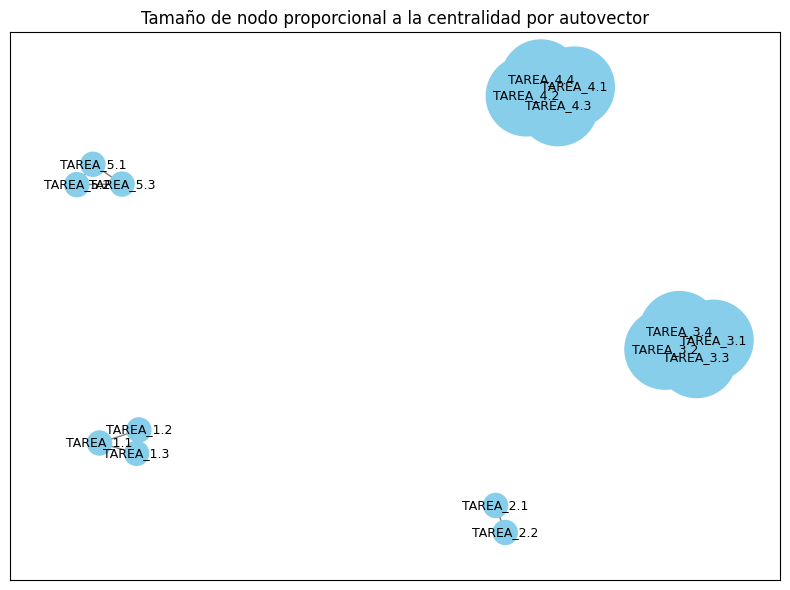

In [ ]:
# --- Visualización con tamaño proporcional a eigenvector ---
pos = nx.spring_layout(G, seed=42)  # genera posiciones automáticas (puedes cambiarlo)
sizes = np.array([eig_cent[n] for n in G.nodes()])
sizes = 300 + 3000*(sizes - sizes.min())/(sizes.max() - sizes.min() + 1e-12)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_size=sizes, node_color="skyblue", edge_color="gray", font_size=9)
plt.title("Tamaño de nodo proporcional a la centralidad por autovector")
plt.tight_layout()
plt.show()


# 7. Distribucion de Grados

 DISTRIBUCIÓN DE GRADOS
------------------------------------------------------------

 Estadísticas de grado:
           grado
count  16.000000
mean    2.375000
std     0.718795
min     1.000000
25%     2.000000
50%     2.500000
75%     3.000000
max     3.000000


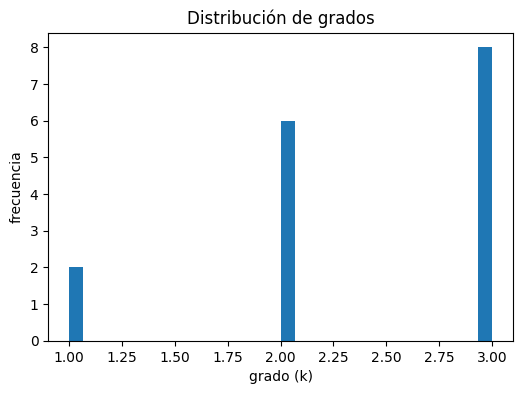

In [ ]:
print(" DISTRIBUCIÓN DE GRADOS")
print("-" * 60)

# Calcular distribución
deg = dict(G.degree())
df_deg = pd.Series(deg, name="grado").to_frame()
print("\n Estadísticas de grado:")
print(df_deg.describe())

# Histograma
plt.figure(figsize=(6,4))
plt.hist(df_deg["grado"], bins=30)
plt.xlabel("grado (k)")
plt.ylabel("frecuencia")
plt.title("Distribución de grados")
plt.show()


 CCDF (Primeras 15 filas):

   grado (k)  P(K ≥ k)
0          1    0.9375
1          1    0.8750
2          2    0.8125
3          2    0.7500
4          2    0.6875
5          2    0.6250
6          2    0.5625
7          2    0.5000
8          3    0.4375
9          3    0.3750


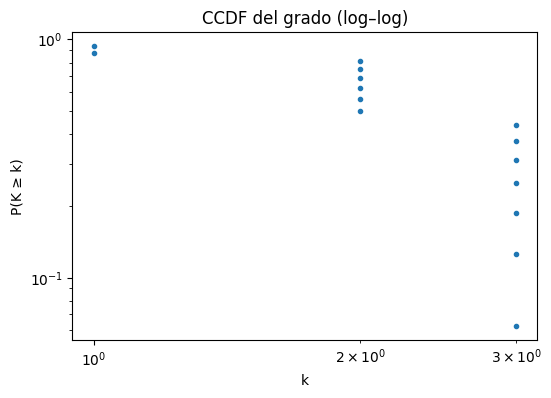

In [ ]:
# Calcular CCDF (log–log)
vals = df_deg["grado"].values
vals_sorted = np.sort(vals)
ccdf_y = 1.0 - np.arange(1, len(vals_sorted)+1)/len(vals_sorted)

tabla_ccdf = pd.DataFrame({
    "grado (k)": vals_sorted,
    "P(K ≥ k)": ccdf_y
})

print("\n CCDF (Primeras 15 filas):\n")
print(tabla_ccdf.head(10))

plt.figure(figsize=(6,4))
plt.loglog(vals_sorted, ccdf_y, marker='.', linestyle='none')
plt.xlabel("k")
plt.ylabel("P(K ≥ k)")
plt.title("CCDF del grado (log–log)")
plt.show()


- Para k = 1: El 93.75% de los nodos tienen grado ≥ 1

- Para k = 2: El 81.25% de los nodos tienen grado ≥ 2

- Para k = 3: El 43.75% de los nodos tienen grado ≥ 3

In [ ]:
# Guardar distribución
ruta_grados = CARPETA_RESULTADOS / "distribucion_grados.csv"
tabla_ccdf.to_csv(ruta_grados, index=False)
print(f"✓ Distribución de grados guardada en: {ruta_grados}")

✓ Distribución de grados guardada en: resultados/distribucion_grados.csv


# 8. Deteccion de Comunidades

In [ ]:
from networkx.algorithms import community

In [ ]:
print(" DETECCIÓN DE COMUNIDADES")
print("-" * 60)

comunidades = community.greedy_modularity_communities(G, weight='weight')
modularidad = community.modularity(G, comunidades, weight='weight')

print(f"✓ Comunidades detectadas: {len(comunidades)}")
print(f"✓ Modularidad: {modularidad:.4f}")

 DETECCIÓN DE COMUNIDADES
------------------------------------------------------------
✓ Comunidades detectadas: 5
✓ Modularidad: 0.7479


In [ ]:
# Asignar comunidades a nodos
comunidad_map = {}
for i, com in enumerate(comunidades):
    for nodo in com:
        comunidad_map[nodo] = i

# Tabla resumen por comunidad
resumen_comunidades = []
for i, com in enumerate(comunidades):
    subgrafo = G.subgraph(com)
    resumen_comunidades.append({
        'comunidad': i,
        'tamaño': len(com),
        'enlaces_internos': subgrafo.number_of_edges(),
        'densidad': nx.density(subgrafo)
    })

df_comunidades = pd.DataFrame(resumen_comunidades)
print("\n Resumen por comunidad:")
print(df_comunidades)


 Resumen por comunidad:
   comunidad  tamaño  enlaces_internos  densidad
0          0       4                 6       1.0
1          1       4                 6       1.0
2          2       3                 3       1.0
3          3       3                 3       1.0
4          4       2                 1       1.0


In [ ]:
# Guardar resultados
ruta_comunidades = CARPETA_RESULTADOS / "comunidades.csv"
df_comunidades.to_csv(ruta_comunidades, index=False)
print(f"✓ Comunidades guardadas en: {ruta_comunidades}")

✓ Comunidades guardadas en: resultados/comunidades.csv


# 9. Pares Complementarios (Top Aristas)

In [ ]:
print("ANÁLISIS DE PARES COMPLEMENTARIOS")
print("-" * 60)

# Extraer top aristas por peso
edges_weighted = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
edges_sorted = sorted(edges_weighted, key=lambda x: x[2], reverse=True)

df_pares = pd.DataFrame(edges_sorted, columns=['tarea_1', 'tarea_2', 'peso'])

print("\n• Top 20 pares de tareas más complementarias:\n")
print(df_pares.head(20))

ANÁLISIS DE PARES COMPLEMENTARIOS
------------------------------------------------------------

• Top 20 pares de tareas más complementarias:

      tarea_1    tarea_2  peso
0   TAREA_1.2  TAREA_1.1     1
1   TAREA_1.2  TAREA_1.3     1
2   TAREA_1.1  TAREA_1.3     1
3   TAREA_5.1  TAREA_5.3     1
4   TAREA_5.1  TAREA_5.2     1
5   TAREA_5.3  TAREA_5.2     1
6   TAREA_2.1  TAREA_2.2     1
7   TAREA_3.3  TAREA_3.2     1
8   TAREA_3.3  TAREA_3.1     1
9   TAREA_3.3  TAREA_3.4     1
10  TAREA_3.2  TAREA_3.1     1
11  TAREA_3.2  TAREA_3.4     1
12  TAREA_3.1  TAREA_3.4     1
13  TAREA_4.3  TAREA_4.2     1
14  TAREA_4.3  TAREA_4.4     1
15  TAREA_4.3  TAREA_4.1     1
16  TAREA_4.2  TAREA_4.1     1
17  TAREA_4.2  TAREA_4.4     1
18  TAREA_4.4  TAREA_4.1     1


In [ ]:
# Guardar pares
ruta_pares = CARPETA_RESULTADOS / "pares_complementarios.csv"
df_pares.to_csv(ruta_pares, index=False)
print(f"✓ Pares complementarios guardados en: {ruta_pares}")

✓ Pares complementarios guardados en: resultados/pares_complementarios.csv


# 10 Visualizaciones

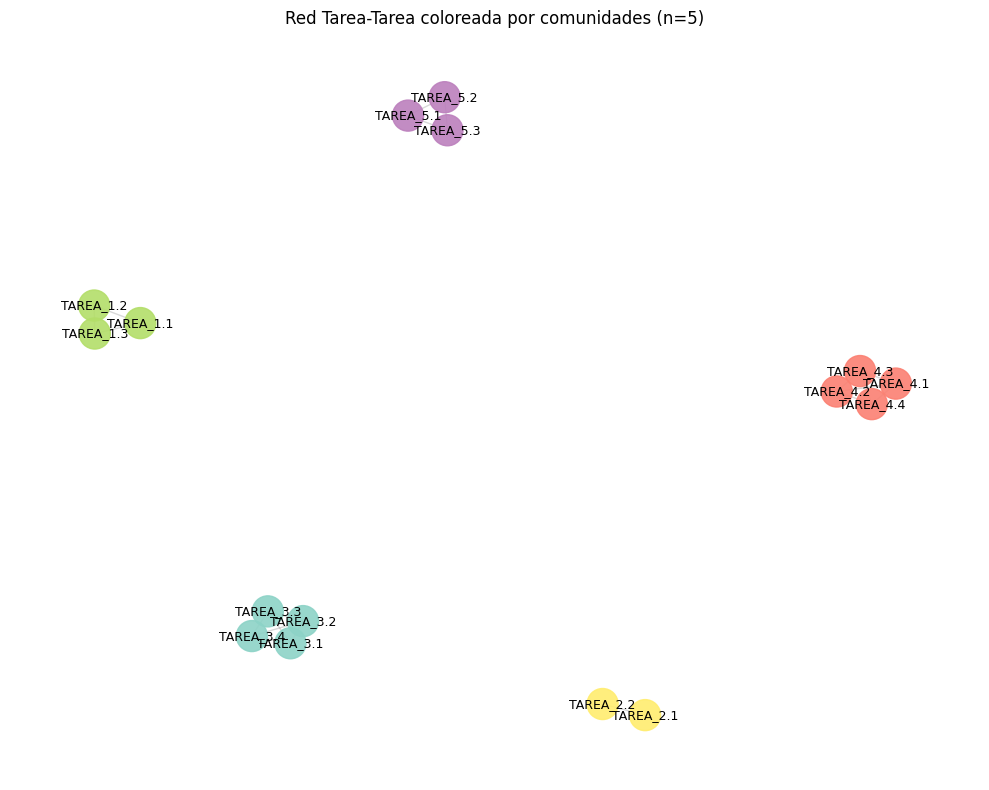

In [ ]:
# Red tarea-tarea con comunidades
pos = nx.spring_layout(G, seed=SEED_LAYOUT)
colores = [comunidad_map.get(n, 0) for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=colores, node_size=500,
                       cmap=plt.cm.Set3, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title(f"Red Tarea-Tarea coloreada por comunidades (n={len(comunidades)})")
plt.axis('off')
plt.tight_layout()

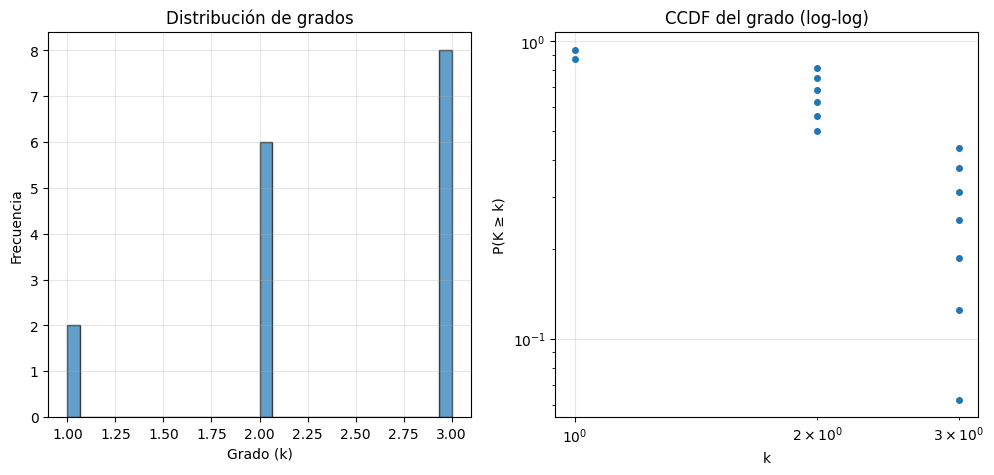

In [ ]:
# Distribución de grados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
axes[0].hist(df_deg["grado"], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel("Grado (k)")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribución de grados")
axes[0].grid(alpha=0.3)

# CCDF log-log
axes[1].loglog(vals_sorted, ccdf_y, marker='.', linestyle='none', markersize=8)
axes[1].set_xlabel("k")
axes[1].set_ylabel("P(K ≥ k)")
axes[1].set_title("CCDF del grado (log-log)")
axes[1].grid(alpha=0.3)

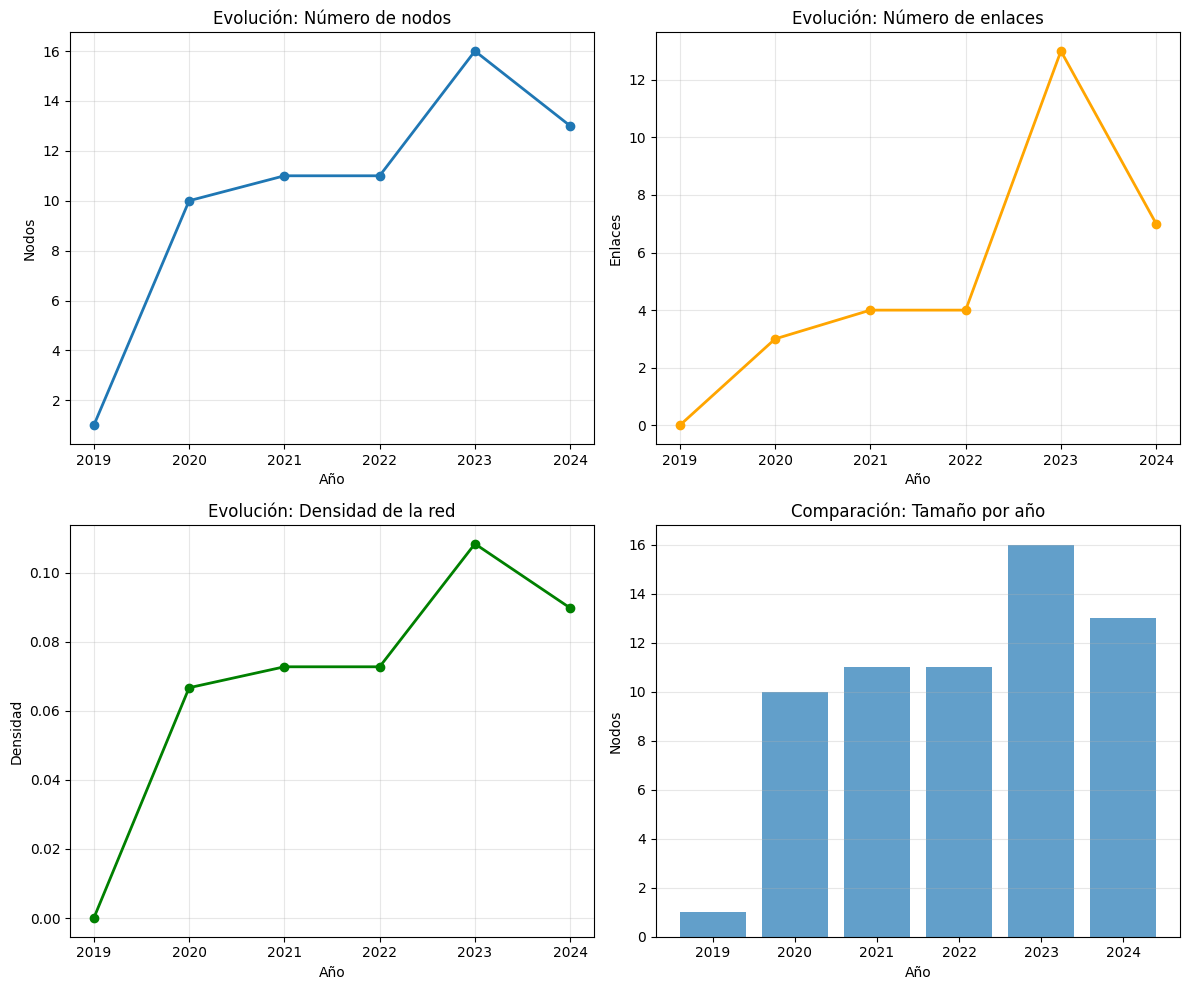

In [ ]:
# Evolución temporal
if len(metricas_temporales) > 1:
    df_temp = pd.DataFrame(metricas_temporales)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    axes[0, 0].plot(df_temp['año'], df_temp['nodos'], marker='o', linewidth=2)
    axes[0, 0].set_title("Evolución: Número de nodos")
    axes[0, 0].set_xlabel("Año")
    axes[0, 0].set_ylabel("Nodos")
    axes[0, 0].grid(alpha=0.3)

    axes[0, 1].plot(df_temp['año'], df_temp['enlaces'], marker='o', linewidth=2, color='orange')
    axes[0, 1].set_title("Evolución: Número de enlaces")
    axes[0, 1].set_xlabel("Año")
    axes[0, 1].set_ylabel("Enlaces")
    axes[0, 1].grid(alpha=0.3)

    axes[1, 0].plot(df_temp['año'], df_temp['densidad'], marker='o', linewidth=2, color='green')
    axes[1, 0].set_title("Evolución: Densidad de la red")
    axes[1, 0].set_xlabel("Año")
    axes[1, 0].set_ylabel("Densidad")
    axes[1, 0].grid(alpha=0.3)

    axes[1, 1].bar(df_temp['año'], df_temp['nodos'], alpha=0.7)
    axes[1, 1].set_title("Comparación: Tamaño por año")
    axes[1, 1].set_xlabel("Año")
    axes[1, 1].set_ylabel("Nodos")
    axes[1, 1].grid(alpha=0.3, axis='y')

    plt.tight_layout()

# 11. Resumen Final

In [ ]:
print("\n\n" + "="*60)
print("RESUMEN DE RESULTADOS")
print("="*60)

print(f"\n📊 ARCHIVOS GENERADOS:")
print(f"\nRedes guardadas en: {CARPETA_REDES}")
print(f"  • Red bipartita")
print(f"  • Red tarea-tarea (completa y filtrada)")
print(f"  • {len(redes_por_año)} redes temporales")

print(f"\nResultados en: {CARPETA_RESULTADOS}")
print(f"  • Métricas globales")
print(f"  • Métricas temporales")
print(f"  • Centralidades")
print(f"  • Distribución de grados")
print(f"  • Comunidades")
print(f"  • Pares complementarios")

print(f"\nFiguras en: {CARPETA_FIGURAS}")
print(f"  • Red bipartita")
print(f"  • Red por comunidades")
print(f"  • Distribución de grados")
print(f"  • Evolución temporal")

print("\n" + "="*60)
print("ANÁLISIS COMPLETADO ✓")
print("="*60)



RESUMEN DE RESULTADOS

📊 ARCHIVOS GENERADOS:

Redes guardadas en: redes_guardadas
  • Red bipartita
  • Red tarea-tarea (completa y filtrada)
  • 6 redes temporales

Resultados en: resultados
  • Métricas globales
  • Métricas temporales
  • Centralidades
  • Distribución de grados
  • Comunidades
  • Pares complementarios

Figuras en: figuras
  • Red bipartita
  • Red por comunidades
  • Distribución de grados
  • Evolución temporal

ANÁLISIS COMPLETADO ✓
